In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
import shutil

# Define source and destination paths
source_dir = "/content/drive/MyDrive/data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/"
dest_dir = "/content/BreakHis_40X/"

# Create destination folders
os.makedirs(dest_dir, exist_ok=True)
os.makedirs(dest_dir + "benign/", exist_ok=True)
os.makedirs(dest_dir + "malignant/", exist_ok=True)

# Walk through all subdirectories and find 40X images
for root, _, files in os.walk(source_dir):
    for filename in files:
        if "40X" in root and filename.endswith((".png", ".jpg", ".jpeg")):  # Check if folder path contains '40X'
            category = "benign" if "benign" in root.lower() else "malignant"
            src_path = os.path.join(root, filename)
            dest_path = os.path.join(dest_dir, category, filename)
            shutil.copy(src_path, dest_path)

print("✅ All 40X images successfully copied to BreakHis_40X!")

✅ All 40X images successfully copied to BreakHis_40X!


In [6]:
import os

source_dir = "/content/drive/MyDrive/data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/"
count_40x = 0

for root, _, files in os.walk(source_dir):
    if "40X" in root:
        for file in files:
            if file.lower().endswith((".png", ".jpg", ".jpeg")):
                count_40x += 1

print(f"Total 40X images in the original dataset: {count_40x}")

Total 40X images in the original dataset: 1975


In [7]:
import os

# Define the paths where you copied the 40X images
benign_path = "/content/BreakHis_40X/benign/"
malignant_path = "/content/BreakHis_40X/malignant/"

# Count number of files in each
benign_count = len([f for f in os.listdir(benign_path) if f.endswith((".png", ".jpg", ".jpeg"))])
malignant_count = len([f for f in os.listdir(malignant_path) if f.endswith((".png", ".jpg", ".jpeg"))])

# Total
total_copied = benign_count + malignant_count

print(f"Copied 40X benign images: {benign_count}")
print(f"Copied 40X malignant images: {malignant_count}")
print(f"Total copied 40X images: {total_copied}")

Copied 40X benign images: 605
Copied 40X malignant images: 1370
Total copied 40X images: 1975


In [9]:
IMAGE_SIZE = (224, 224)  # Works well with pretrained models like ResNet, VGG, etc.

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = "/content/BreakHis_40X/"

# Create an ImageDataGenerator with normalization and train/val split
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Training data loader
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

# Validation data loader
val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=True
)

Found 1580 images belonging to 2 classes.
Found 395 images belonging to 2 classes.


In [11]:
print(train_generator.class_indices)

{'benign': 0, 'malignant': 1}


In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 226s 4s/step - accuracy: 0.6079 - loss: 0.9193 - val_accuracy: 0.6937 - val_loss: 0.5724
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 216s 4s/step - accuracy: 0.6887 - loss: 0.6288 - val_accuracy: 0.6937 - val_loss: 0.5331
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 226s 5s/step - accuracy: 0.7065 - loss: 0.5448 - val_accuracy: 0.7747 - val_loss: 0.5096
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 226s 4s/step - accuracy: 0.7970 - loss: 0.4952 - val_accuracy: 0.7595 - val_loss: 0.4939
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 217s 4s/step - accuracy: 0.7632 - loss: 0.5051 - val_accuracy: 0.8177 - val_loss: 0.4789
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 224s 4s/step - accuracy: 0.7914 - loss: 0.4988 - val_accuracy: 0.7975 - val_loss: 0.4710
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 257s 4s/step - accuracy: 0.7703 - loss: 0.5178 - val_accuracy: 0.8051 - val_loss: 0.4726
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 222s 4s/step - accuracy: 0.8022 - loss: 0.4793 - val_accuracy: 0.7975 - v

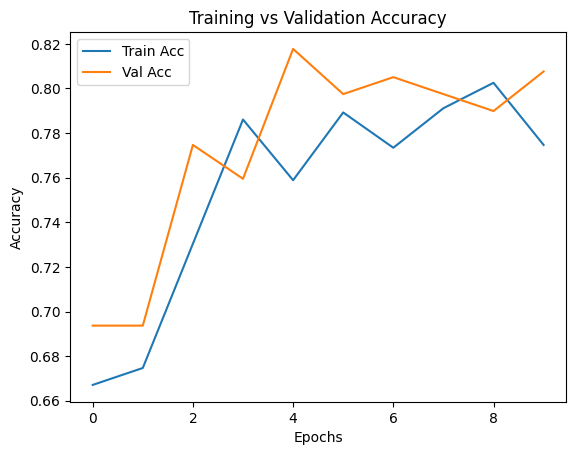

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step


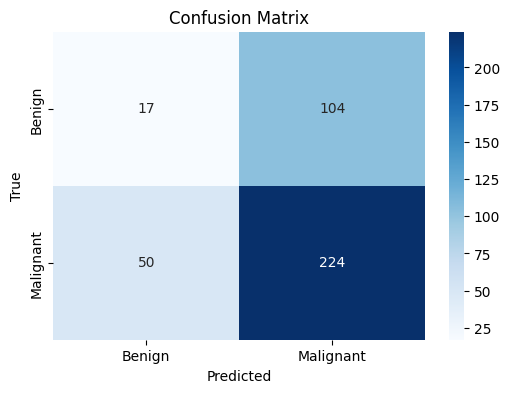

              precision    recall  f1-score   support

      Benign       0.25      0.14      0.18       121
   Malignant       0.68      0.82      0.74       274

    accuracy                           0.61       395
   macro avg       0.47      0.48      0.46       395
weighted avg       0.55      0.61      0.57       395



In [18]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get true labels and predictions
val_generator.reset()
Y_pred = model.predict(val_generator, verbose=1)
y_pred = (Y_pred > 0.5).astype(int).flatten()  # Convert probabilities to 0 or 1
y_true = val_generator.classes  # Actual labels

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot it
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_true, y_pred, target_names=['Benign', 'Malignant']))

In [19]:
model.save('/content/predictcare_model_40X.h5')
print("Model saved successfully!")

Model saved successfully!


In [20]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D

# Load ResNet50 without top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
base_model.trainable = False

# Correct way to connect new layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Instead of Flatten()
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)  # Binary classification

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 24,637,313 (93.98 MB)

 Trainable params: 1,049,601 (4.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [21]:
import os
import shutil

# Define source and destination directories
source_dir = "/content/drive/MyDrive/data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/"
destination_dir = "/content/BreakHis_All/"

# Ensure destination directory exists
os.makedirs(destination_dir, exist_ok=True)

# Copy images from all magnification levels
magnifications = ["40X", "100X", "200X", "400X"]

for category in ["benign", "malignant"]:
    category_path = os.path.join(source_dir, category)
    for root, dirs, files in os.walk(category_path):
        if any(mag in root for mag in magnifications):  # Check if the folder contains images for a magnification
            for file in files:
                if file.endswith(".png") or file.endswith(".jpg"):
                    source_file = os.path.join(root, file)
                    dest_file = os.path.join(destination_dir, category + "_" + file)  # Rename to include category
                    shutil.copy(source_file, dest_file)

print("All images copied to BreakHis_All!")

All images copied to BreakHis_All!


In [22]:
data_dir = "/content/BreakHis_All/"

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=True
)

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [23]:
import os
import shutil

data_dir = "/content/BreakHis_All/"

# Create class subdirectories
benign_dir = os.path.join(data_dir, "benign")
malignant_dir = os.path.join(data_dir, "malignant")

os.makedirs(benign_dir, exist_ok=True)
os.makedirs(malignant_dir, exist_ok=True)

# Move images into respective folders
for file in os.listdir(data_dir):
    if file.startswith("benign_"):
        shutil.move(os.path.join(data_dir, file), os.path.join(benign_dir, file))
    elif file.startswith("malignant_"):
        shutil.move(os.path.join(data_dir, file), os.path.join(malignant_dir, file))

print("Images moved successfully!")

Images moved successfully!


In [24]:
import os

benign_count = len(os.listdir("/content/BreakHis_All/benign"))
malignant_count = len(os.listdir("/content/BreakHis_All/malignant"))

print(f"Benign images: {benign_count}")
print(f"Malignant images: {malignant_count}")
print(f"Total images: {benign_count + malignant_count}")

Benign images: 2386
Malignant images: 5429
Total images: 7815


In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directory where images are stored
data_dir = "/content/BreakHis_All/"

# Define ImageDataGenerator for preprocessing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load training data
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),  # Adjust based on your model
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

# Load validation data
val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=True
)

Found 6253 images belonging to 2 classes.
Found 1562 images belonging to 2 classes.


In [26]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load base model without top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model layers

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)  # Binary classification

# Final model
model = Model(inputs=base_model.input, outputs=x)

# Compile
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 24,637,313 (93.98 MB)

 Trainable params: 1,049,601 (4.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10  # Start with 10, you can increase if needed
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 51/196 ━━━━━━━━━━━━━━━━━━━━ 13:02 5s/step - accuracy: 0.6310 - loss: 0.6957

UnknownError: Graph execution error:

Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7ab4e3a7ee80>
Traceback (most recent call last):

  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/ops/script_ops.py", line 269, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py", line 248, in _finite_generator
    yield self._standardize_batch(self.py_dataset[i])
                                  ~~~~~~~~~~~~~~~^^^

  File "/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py", line 68, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py", line 313, in _get_batches_of_transformed_samples
    img = image_utils.load_img(
          ^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/image_utils.py", line 236, in load_img
    img = pil_image.open(io.BytesIO(f.read()))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/PIL/Image.py", line 3532, in open
    raise UnidentifiedImageError(msg)

PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7ab4e3a7ee80>


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_multi_step_on_iterator_25988]

In [27]:
import os
from PIL import Image

bad_images = []
data_dir = "/content/BreakHis_All/"

for root, dirs, files in os.walk(data_dir):
    for file in files:
        file_path = os.path.join(root, file)
        try:
            img = Image.open(file_path)
            img.verify()  # Verify if it's a valid image
        except Exception as e:
            bad_images.append(file_path)

print("Corrupt or invalid images:", bad_images)

Corrupt or invalid images: ['/content/BreakHis_All/malignant/malignant_SOB_M_MC-14-18842-100-013.png', '/content/BreakHis_All/benign/benign_SOB_B_PT-14-29315EF-400-011.png']


In [28]:
import os
from PIL import Image

data_dir = "/content/BreakHis_All/"

# List to store paths of corrupt images
bad_images = []

for root, dirs, files in os.walk(data_dir):
    for file in files:
        file_path = os.path.join(root, file)
        try:
            img = Image.open(file_path)
            img.verify()  # Check if it's a valid image
        except Exception:
            bad_images.append(file_path)

# Delete corrupt images
for bad_img in bad_images:
    os.remove(bad_img)
    print(f"Deleted: {bad_img}")

print("Cleanup completed. Corrupt images removed.")

Deleted: /content/BreakHis_All/malignant/malignant_SOB_M_MC-14-18842-100-013.png
Deleted: /content/BreakHis_All/benign/benign_SOB_B_PT-14-29315EF-400-011.png
Cleanup completed. Corrupt images removed.


In [29]:
import os
print(os.path.exists('/content/BreakHis_All/benign/benign_SOB_B_PT-14-29315EF-400-011.png'))

False


In [30]:
import os

missing_files = []
data_dir = "/content/BreakHis_All/benign/"  # Change this path if needed

for file in os.listdir(data_dir):
    file_path = os.path.join(data_dir, file)
    if not os.path.exists(file_path):
        missing_files.append(file_path)

print(f"Total missing files: {len(missing_files)}")
print(missing_files)

Total missing files: 0
[]


In [31]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    "/content/BreakHis_All/",
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    "/content/BreakHis_All/",
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=True
)

print("Data successfully loaded!")

Found 6251 images belonging to 2 classes.
Found 1562 images belonging to 2 classes.
Data successfully loaded!


In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10  # Start with 10, you can increase if needed
)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1336s 7s/step - accuracy: 0.6600 - loss: 0.6595 - val_accuracy: 0.6946 - val_loss: 0.6227
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1310s 7s/step - accuracy: 0.6725 - loss: 0.6384 - val_accuracy: 0.6908 - val_loss: 0.6267
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1299s 7s/step - accuracy: 0.7011 - loss: 0.6112 - val_accuracy: 0.6882 - val_loss: 0.6260
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1301s 7s/step - accuracy: 0.7099 - loss: 0.6056 - val_accuracy: 0.6921 - val_loss: 0.6213
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1295s 7s/step - accuracy: 0.7220 - loss: 0.5906 - val_accuracy: 0.6927 - val_loss: 0.6196
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1301s 7s/step - accuracy: 0.7011 - loss: 0.6033 - val_accuracy: 0.6927 - val_loss: 0.6224
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1296s 7s/step - accuracy: 0.7111 - loss: 0.5991 - val_accuracy: 0.6927 - val_loss: 0.6162
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1297s 7s/step - accuracy: 0.7050 - loss: 0.6007 - 

In [ ]:
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

49/49 ━━━━━━━━━━━━━━━━━━━━ 263s 5s/step - accuracy: 0.6862 - loss: 0.6174
49/49 ━━━━━━━━━━━━━━━━━━━━ 263s 5s/step - accuracy: 0.6862 - loss: 0.6174
Validation Accuracy: 68.69%
Validation Accuracy: 68.69%


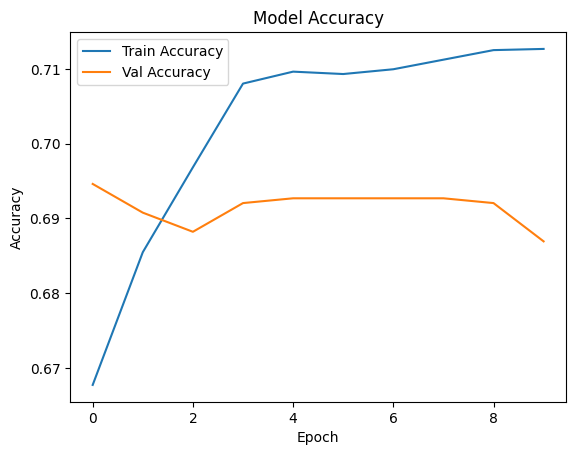

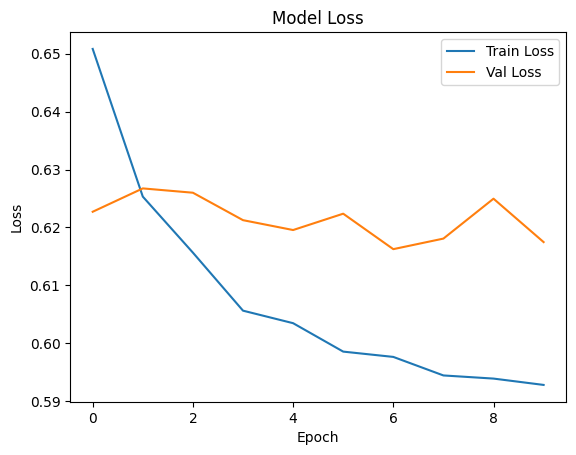

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.save("/content/breast_cancer_classifier_model.h5")

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/breast_cancer_classifier_model.h5')

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_image(img_path, model, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Batch dimension
    img_array /= 255.0  # Normalize

    prediction = model.predict(img_array)[0][0]

    if prediction > 0.5:
        print(f"Prediction: Malignant ({prediction:.2f})")
    else:
        print(f"Prediction: Benign ({1 - prediction:.2f})")

In [ ]:
predict_image('/content/BreakHis_All/benign/benign_SOB_B_A-14-22549AB-100-001.png', model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction: Malignant (0.69)


In [ ]:
import numpy as np

val_generator.reset()
preds = model.predict(val_generator, verbose=1)
predicted_classes = (preds > 0.5).astype(int).reshape(-1)
true_classes = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

39/49 ━━━━━━━━━━━━━━━━━━━━ 54s 5s/step

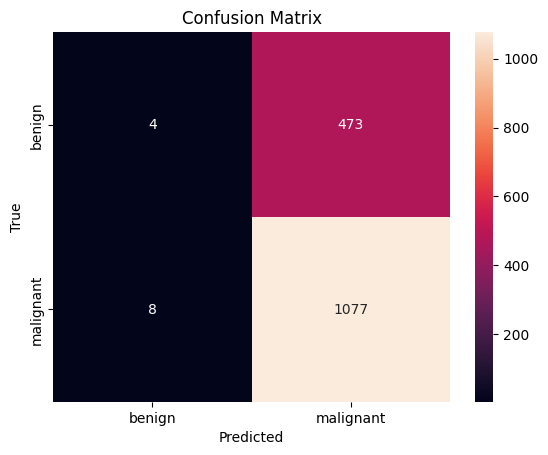

              precision    recall  f1-score   support

      benign       0.33      0.01      0.02       477
   malignant       0.69      0.99      0.82      1085

    accuracy                           0.69      1562
   macro avg       0.51      0.50      0.42      1562
weighted avg       0.58      0.69      0.57      1562



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

In [33]:
from collections import Counter

# Assuming you used ImageDataGenerator.flow_from_directory for training
train_classes = train_generator.classes  # array of labels (0: benign, 1: malignant)
class_counts = Counter(train_classes)

total = sum(class_counts.values())
weight_for_benign = total / (2 * class_counts[0])
weight_for_malignant = total / (2 * class_counts[1])

class_weight = {
    0: weight_for_benign,
    1: weight_for_malignant
}

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    class_weight=class_weight
)

Epoch 1/10


NotImplementedError: numpy() is only available when eager execution is enabled.

In [34]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [35]:
weight_for_benign = total / (2 * class_counts[0])
weight_for_malignant = total / (2 * class_counts[1])

In [36]:
print(type(weight_for_benign), type(weight_for_malignant))

<class 'float'> <class 'float'>


In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

class_weight = {
    0: float(weight_for_benign),
    1: float(weight_for_malignant)
}

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    class_weight=class_weight
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


ValueError: Unknown variable: <Variable path=dense_4/kernel, shape=(2048, 512), dtype=float32, value=[[ 0.01733968  0.02858473  0.01250536 ... -0.01696903 -0.0323992
  -0.0400591 ]
 [-0.04540138  0.01505256 -0.00648139 ... -0.02388685 -0.0224492
   0.02585958]
 [-0.00290759 -0.02679961  0.00945262 ... -0.01463313  0.01783513
  -0.00280875]
 ...
 [ 0.01404161  0.03894214 -0.03129294 ... -0.02796527  0.00334331
   0.00706688]
 [-0.00102645 -0.02281867  0.02482161 ... -0.02285017 -0.03512557
   0.0477858 ]
 [ 0.0087195  -0.04226851 -0.03293069 ...  0.01737098  0.00180763
  -0.03458571]]>. This optimizer can only be called for the variables it was originally built with. When working with a new set of variables, you should recreate a new optimizer instance.

In [ ]:
# If you modified or reloaded the model, always recompile it:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # or 'binary_crossentropy' for binary classification
    metrics=['accuracy']
)

# Then you can safely train it
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    class_weight=class_weight
)

NameError: name 'model' is not defined

In [37]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=3,
    class_weight=class_weight
)

# Save the model
model.save('/content/model_epoch3.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


196/196 ━━━━━━━━━━━━━━━━━━━━ 5511s 28s/step - accuracy: 0.5076 - loss: 0.7912 - val_accuracy: 0.6460 - val_loss: 0.6659
Epoch 2/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 5418s 28s/step - accuracy: 0.5291 - loss: 0.7067 - val_accuracy: 0.3464 - val_loss: 0.7476
Epoch 3/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 5433s 28s/step - accuracy: 0.5296 - loss: 0.6876 - val_accuracy: 0.5410 - val_loss: 0.6882


In [42]:
# If you modified or reloaded the model, always recompile it:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # or 'binary_crossentropy' for binary classification
    metrics=['accuracy']
)

In [44]:
from tensorflow.keras.models import load_model

# Load saved model
model = load_model('/content/model_epoch3.h5')

# Continue training from epoch 3 to 6
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=6,
    initial_epoch=3,
    class_weight=class_weight
)

# Save again
model.save('/content/model_epoch6.h5')

Epoch 4/6


ValueError: Unknown variable: <Variable path=dense_4/kernel, shape=(2048, 512), dtype=float32, value=[[-0.03824977 -0.04772744  0.04350796 ...  0.00010784 -0.03115554
   0.02471512]
 [ 0.0418014   0.03659847 -0.04226491 ... -0.04539681  0.02489311
  -0.04015025]
 [-0.02158097 -0.00053696  0.0161729  ... -0.01236534  0.00645726
   0.00961231]
 ...
 [-0.04543782  0.04504623  0.04201374 ... -0.04544433 -0.03049053
   0.00137574]
 [-0.00736286  0.02093912 -0.04540453 ...  0.0147768   0.03117479
   0.03762142]
 [ 0.02999859  0.03177184 -0.03530672 ... -0.01897462  0.01171398
   0.00060451]]>. This optimizer can only be called for the variables it was originally built with. When working with a new set of variables, you should recreate a new optimizer instance.

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

# Load the model
model = load_model('/content/model_epoch3.h5')

# Recompile with a new optimizer
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Continue training from epoch 3 to 6
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=6,
    initial_epoch=3,
    class_weight=class_weight
)

# Save the updated model
model.save('/content/model_epoch6.h5')

Epoch 4/6


/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


178/196 ━━━━━━━━━━━━━━━━━━━━ 7:36 25s/step - accuracy: 0.3140 - loss: 0.0000e+00

/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(11, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 25s/step - accuracy: 0.3132 - loss: 0.0000e+00 